<p>
<img src="http://www.cerm.unifi.it/chianti/images/logo%20unifi_positivo.jpg" 
        alt="UniFI logo" style="float: left; width: 20%; height: 20%;">
<div align="right">
Massimo Nocentini<br>
<small>
<br>November 15, 2016: class
</small>
</div>
</p>
<br>
<br>
<div align="center">
<b>Abstract</b><br>
Lecture notes of today (November 15, 2016) class in Python, about simulation applied to Quicksort's checks and swaps.
</div>

In [111]:
from sympy import *

import sys

from random import shuffle

from itertools import permutations
from statistics import mean

sys.setrecursionlimit(10000000)
init_printing()

In [2]:
t, m, i, k, n = symbols('t m i k n')
a, b = IndexedBase('a'), IndexedBase('b')

# Quicksort

In [180]:
def counting_instrumented(quicksort):
    
    
    def instrumented(array, counting_data=True):

        checks, swaps = 0, 0

        def check_handler(index, pivot):
            nonlocal checks
            checks += 1

        def swap_handler(index, pivot):
            nonlocal swaps
            swaps += 1

        sorted_array = quicksort(array, check_handler, swap_handler)
        return (sorted_array, checks, swaps) if counting_data else sorted_array
    
    return instrumented

In [181]:
@counting_instrumented
def quicksort(array, 
              check_performed=lambda index, pivot: None,
              swap_performed=lambda i, j: None):
    
    def rec(v):
        
        if not v: return v

        p = v[-1]
        i, j = -1, len(v)-1

        while i < j:

            i += 1
            check_performed(index=i, pivot=p)
            while v[i] < p: 
                check_performed(index=i, pivot=p)
                i += 1
            
            j -= 1
            check_performed(index=j, pivot=p)
            while 0 <= j and v[j] > p: 
                check_performed(index=j, pivot=p)
                j -= 1
                
            if i < j: 
                v[i], v[j] = v[j], v[i]
                swap_performed(i, j)

        v[i], v[-1] = v[-1], v[i] # discard this swap from counting

        return rec(v[:i]) + [p] + rec(v[i+1:])

    return rec(array[:])
    

In [182]:
array = list(range(10))
shuffle(array)
array

In [183]:
quicksort(array, counting_data=False)

In [184]:
array

In [185]:
quicksort(array, counting_data=True)

In [186]:
array

In [187]:
perms = list(permutations(range(4)))
len(perms)

In [188]:
perms

In [189]:
def C(n):
    return 2*(n+1)*(harmonic(n+1)-1) if n else 0

def S(n):
    return 1/Integer(3)*(n+1)*(harmonic(n+1)-Integer(7)/3)+Integer(1)/2 if n > 1 else 0

In [277]:
def simulation(f):
    
    def simulated(*args, **kwds):
        
        doit = kwds.pop('doit', False)
        
        arrays = f(*args, **kwds)
        n = len(list(arrays))
        all_checks, all_swaps = [], []
        for sarray, checks, swaps in map(quicksort, arrays):
            all_checks.append(checks)
            all_swaps.append(swaps)

        
        cm, sm = sum(all_checks)/Integer(n), sum(all_swaps)/Integer(n)
        return (cm.evalf(), sm.evalf()) if doit else (cm, sm)

    return simulated

In [273]:
@simulation
def all_permutations(n):
    return [list(perm) for perm in permutations(range(n))]

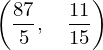

In [274]:
all_permutations(n=5)

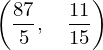

In [275]:
C(5), S(5)

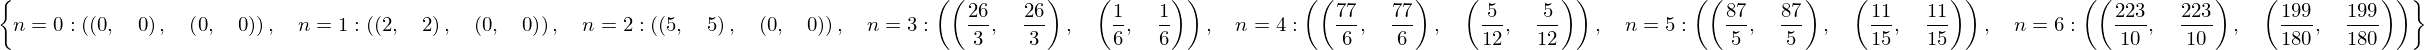

In [276]:
{Eq(Symbol('n'), n): ((cm, C(n)), (sm, S(n))) for n in range(7) for cm, sm in [all_permutations(n)]}

In [284]:
@simulation
def random_permutations(n, N):
    
    perm = list(range(n))
    
    perms = []
    
    for i in range(N):
        shuffle(perm)
        perms.append(list(perm))
    
    return perms

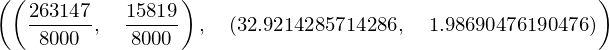

In [285]:
random_permutations(8, 8000), (C(8).evalf(), S(8).evalf())

In [272]:
random_permutations(8, 8000, doit=True), (C(8).evalf(), S(8).evalf())

In [278]:
random_permutations(100, 1000, doit=True), (C(100).evalf(), S(100).evalf())

In [280]:
dim, step = 100, 10
res = {i: random_permutations(i, i*step, doit=True) for i in range(step, dim+1, step)}
res 

In [281]:
%matplotlib inline
import matplotlib.pyplot as plt

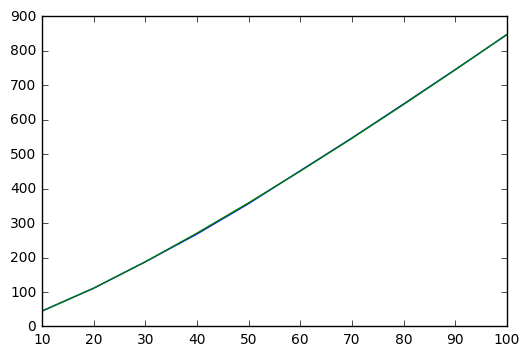

In [282]:
domain = sorted(res.keys())
plt.plot(domain, [res[k][0] for k in domain], 'b',
         domain, [C(n) for n in domain], 'g')
None

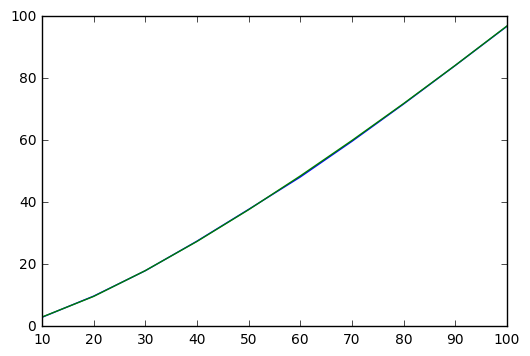

In [283]:
domain = sorted(res.keys())
plt.plot(domain, [res[k][1] for k in domain], 'b',
         domain, [S(n) for n in domain], 'g')
None

---
<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License</a>.